# Kernel PCA on ABA
Takes data to a higher dimensional space where linear relationships are sufficient.
<br>Mapping these linear decision to the lower dimensional space you'd get a nonlinear decision boundary.
<br>We can use the linear tools in the higher dimensional space and get non-linear results in the original space.

In [1]:
import time
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [2]:
# Loading the components
X = np.load('/data/bioprotean/ABA/KernelPCA/poly2/31512_components.npy')

In [4]:
# Loading Lambdas
Lambdas = np.load('/data/bioprotean/ABA/KernelPCA/poly2/31512_lambdas.npy')

In [6]:
# Normalizing the lambdas
norm_lanbdas = Lambdas / np.sum(Lambdas)

# Finding number of components to choose 80% variance
cumsum_arr = np.cumsum(norm_lanbdas)
cumsum_80 = cumsum_arr[cumsum_arr < .8]
n_80v = cumsum_80.shape[0]

# Selecting components for 80% variance
X_80v = X[:,:n_80v]

In [17]:
# K-means clustering the transformed data
n_clusters = 30
kmeans = KMeans(n_clusters = n_clusters, random_state = 0)
kmeans.fit_predict(X_80v)
labels = kmeans.labels_

In [20]:
# reconstructing the brain
indices_file = '/Users/mabbasi6/Documents/Agave/half_indices.npy'
reconstruct_3D = reconstruct_ABA(labels, indices_file, array_3D=True)

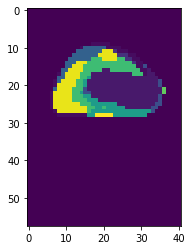

In [24]:
# Visualizing slices
slice = reconstruct_3D[20,:,:]
plt.imshow(slice)

In [30]:
# Standadizing the components
X_std = StandardScaler().fit_transform(X)

In [37]:
# Running TruncatedSVD instead of the normal SVD/PCA
tsvd = TruncatedSVD(n_components = 570, random_state = 0)
trs_data = tsvd.fit_transform(X)

In [38]:
print(np.cumsum(tsvd.explained_variance_ratio_))

[0.10852037 0.1459716  0.18118365 0.20952636 0.23231849 0.25221527
 0.26964129 0.28583278 0.29835144 0.3102349  0.32149721 0.33227126
 0.34140346 0.34996884 0.35830455 0.36602355 0.37248039 0.3787359
 0.3846579  0.390299   0.39569893 0.4006695  0.40534354 0.40998449
 0.41436031 0.41871082 0.42286836 0.4268192  0.43070407 0.43438913
 0.43803426 0.44161619 0.44504847 0.44840597 0.45172235 0.45485477
 0.4579568  0.46093268 0.46390532 0.46685479 0.46971909 0.47249725
 0.47524482 0.47794983 0.48060834 0.48323482 0.48581233 0.48834798
 0.49078961 0.4932221  0.49563595 0.49798875 0.5003256  0.50263126
 0.50489541 0.50709404 0.50924518 0.51135496 0.51344123 0.51549165
 0.51750634 0.51950476 0.52149497 0.52343263 0.52530186 0.52714936
 0.52897874 0.5307939  0.53259445 0.53438461 0.53613282 0.53786621
 0.53957619 0.54127821 0.54296495 0.54462975 0.54628143 0.54790891
 0.54950806 0.55109151 0.55264749 0.55418457 0.5557133  0.55721131
 0.55868765 0.56015864 0.56162569 0.56307284 0.56449631 0.56591

In [20]:
# K-means clustering the transformed data
n_clusters = 594
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
kmeans.fit_predict(trs_data)
labels = kmeans.labels_

In [25]:
# reconstructing the brain
indices_file = '/Users/mabbasi6/Documents/Agave/half_indices.npy'
reconstruct_3D = reconstruct_ABA(labels, indices_file, array_3D=True)

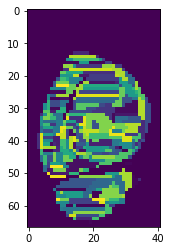

In [39]:
# Visualizing slices
slice = reconstruct_3D[:,15,:]
plt.imshow(slice)

**Data has to be centered in higher dimensional space for PCA**

In [5]:
# Standadizing the components
X_std = StandardScaler().fit_transform(X)

In [40]:
# Applying PCA
variance = 0.8
pca = PCA(variance)
components = pca.fit_transform(X_std)

# np.save('/data/bioprotean/ABA/KernelPCA/poly2/PCA/KPCA_poly2_PC_80v.npy', components)

In [ ]:
# Clustering the PCA components
n_clusters = 50
kmeans = KMeans(init='k-means++', n_clusters=n_clusters, n_init=50, random_state=0)
kmeans.fit_predict(X)
labels = kmeans.labels_

In [19]:
def reconstruct_ABA (vector, indices_file, array_3D = False):
    '''
    This function reconstructs the masked and halved
    vector to the original shape (159326,).
    
    Args:
        vector: vec
            The masked vector
        indices_file: str
            The path to the indices file
        array: bool, default = False
            if True, an array of size (67,58,41) is returned.
    
    Returns:
        output: array
            output vector/array
    '''
    # Loading the indices
    indices = np.load(indices_file)
    
    # Reconstructing the array
    output = np.zeros(159326,)
    output[indices] = vector
    
    # If 3D array is favored
    if array_3D == True:
        output = output.reshape(67,58,41)
    
    return output

In [6]:
# reconstructing the brain
reconstruct_3D = reconstruct_half_ABA(labels, array_3D=True)

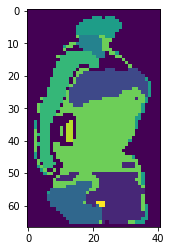

In [9]:
# Visualizing slices
slice = reconstruct_3D[:,20,:]
plt.imshow(slice)